In [1]:
import aocd
from aocd.models import Puzzle
day = 13
year = 2021
puzzle = Puzzle(year=year, day=day)
# data = aocd.get_data(day=day, year=year)
with open('./data/input_{:02d}'.format(day), 'w') as fh:
    fh.write(puzzle.input_data)

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = puzzle.input_data.splitlines()
len(data), data[:10]

(852,
 ['43,593',
  '1139,385',
  '1178,51',
  '216,679',
  '743,185',
  '1241,250',
  '197,60',
  '479,700',
  '565,845',
  '1022,330'])

In [5]:
data[-20:]

['830,283',
 '231,609',
 '249,750',
 '874,397',
 '601,362',
 '599,500',
 '154,245',
 '',
 'fold along x=655',
 'fold along y=447',
 'fold along x=327',
 'fold along y=223',
 'fold along x=163',
 'fold along y=111',
 'fold along x=81',
 'fold along y=55',
 'fold along x=40',
 'fold along y=27',
 'fold along y=13',
 'fold along y=6']

In [4]:
test_data = """6,10
0,14
9,10
0,3
10,4
4,11
6,0
6,12
4,1
0,13
10,12
3,4
3,0
8,4
1,10
2,14
8,10
9,0

fold along y=7
fold along x=5""".splitlines()

In [16]:
def parse(data):
    dots = []
    ins = []
    do=0
    for d in data:
        if d == "":
            do = 1
            continue
        if do == 0:
            x ,y = map(int, d.split(','))
            dots.append([x, y])
        else:
            dim, val = d.strip('fold along ').split('=')
            ins.append([1 if dim=='y' else 0, int(val)])
    return dots, ins

In [37]:
dots, instructions = parse(data)
for dim, val in instructions:
    for dot in dots:
        if dot[dim] > val:
            dot[dim] = 2 * val - dot[dim]
    break

In [38]:
puzzle.answer_a = len(set([tuple(dot) for dot in dots]))

That's the right answer!  You are one gold star closer to finding the sleigh keys. [Continue to Part Two]


In [39]:
# Part B

In [40]:
dots, instructions = parse(data)
for dim, val in instructions:
    for dot in dots:
        if dot[dim] > val:
            dot[dim] = 2 * val - dot[dim]

In [53]:
mx, my = np.array(dots).max(axis=0)
f = np.zeros((mx+1, my+1))


In [54]:
for x, y in dots:
    f[x, y] = 1

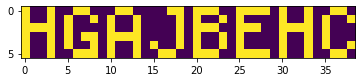

In [56]:
plt.imshow(f.T)

In [58]:
puzzle.answer_b = 'HGAJBEHC'

That's the right answer!  You are one gold star closer to finding the sleigh keys.You have completed Day 13! You can [Shareon
  Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


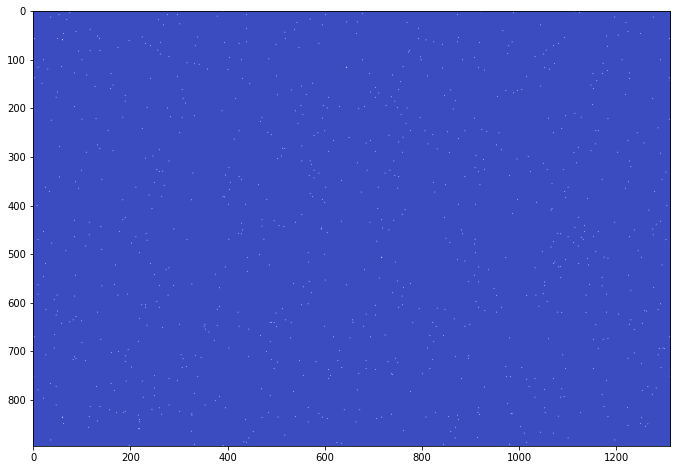

In [74]:
dots, instructions = parse(data)
mx, my = np.array(dots).max(axis=0)
f = np.zeros((mx+1, my+1))
for x, y in dots:
    f[x, y] = 100

plt.rcParams['figure.figsize'] = (12,8)
plt.imshow(f.T, cmap='coolwarm')